In [14]:
from loaders.base import DataLoader
from loaders.yahoo import YFinanceProvider
from indicators.indicator import *
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [8]:
provider = YFinanceProvider()
loader = DataLoader(provider, asset="AAPL", benchmark_asset="SPY", start_date="2022-01-01")

# Load data
df = loader.load()

/Users/denisvolokh/Documents/projects/rl-trading-strategy/loaders/yahoo.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, **kwargs)
[*********************100%***********************]  1 of 1 completed
/Users/denisvolokh/Documents/projects/rl-trading-strategy/loaders/yahoo.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, **kwargs)
[*********************100%***********************]  1 of 1 completed


In [9]:
df.head()

Price,Close,High,Low,Open,Volume,forward_return,return_1,volume_1,return_2,volume_2,...,benchmark_return_2,benchmark_volume_2,benchmark_return_5,benchmark_volume_5,benchmark_return_10,benchmark_volume_10,benchmark_return_20,benchmark_volume_20,benchmark_return_40,benchmark_volume_40
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,178.645630,179.499559,174.425125,174.542902,104487900,-0.012691,-0.012691,-0.049551,-0.038954,-0.095229,...,-0.019531,0.438578,-0.025538,0.642562,-0.04442,0.509726,-0.051831,0.694763,-0.083356,0.620055
2022-01-04,176.378357,179.558473,175.809076,179.254206,99310400,-0.026600,-0.012691,-0.049551,-0.038954,-0.095229,...,-0.019531,0.438578,-0.025538,0.642562,-0.04442,0.509726,-0.051831,0.694763,-0.083356,0.620055
2022-01-05,171.686676,176.839632,171.411853,176.289986,94537600,-0.016693,-0.026600,-0.048059,-0.038954,-0.095229,...,-0.019531,0.438578,-0.025538,0.642562,-0.04442,0.509726,-0.051831,0.694763,-0.083356,0.620055
2022-01-06,168.820663,172.059668,168.467317,169.507721,96904000,0.000988,-0.016693,0.025031,-0.042849,-0.024231,...,-0.020124,0.220293,-0.025538,0.642562,-0.04442,0.509726,-0.051831,0.694763,-0.083356,0.620055
2022-01-07,168.987534,170.921120,167.868606,169.694226,86709100,0.000116,0.000988,-0.105206,-0.015721,-0.082808,...,-0.004889,-0.185838,-0.025538,0.642562,-0.04442,0.509726,-0.051831,0.694763,-0.083356,0.620055


In [12]:
indicators = [
    VolatilityIndicator(),
    MACDIndicator(),
    RSIIndicator(window=14),
    BollingerBandsIndicator(window=20)
]

for indicator in indicators:
    df = indicator.apply(df)

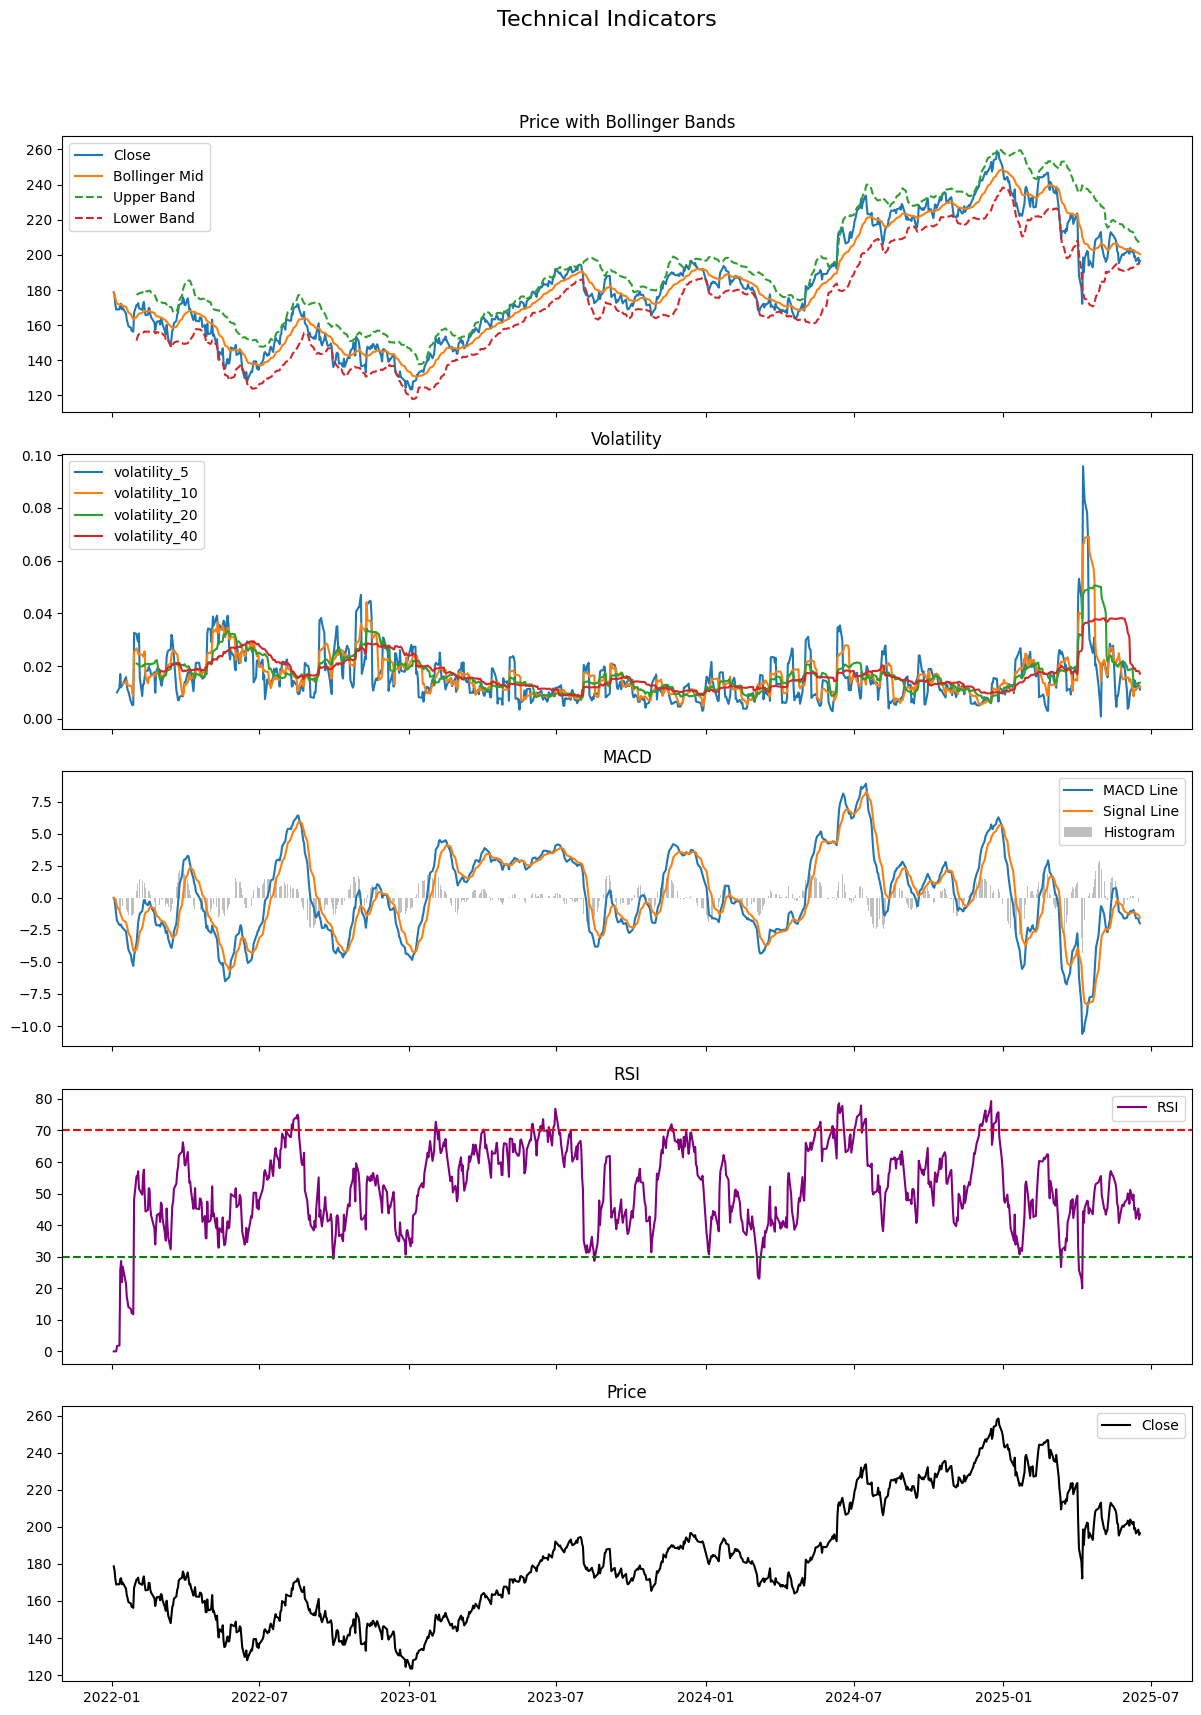

In [17]:
def plot_bollinger_bands(ax, df: pd.DataFrame):
    """
    Plot Close price with Bollinger Bands.
    """
    ax.plot(df.index, df["Close"], label="Close")
    ax.plot(df.index, df["bollinger_mid"], label="Bollinger Mid")
    ax.plot(df.index, df["bollinger_upper"], label="Upper Band", linestyle='--')
    ax.plot(df.index, df["bollinger_lower"], label="Lower Band", linestyle='--')
    ax.set_title("Price with Bollinger Bands")
    ax.legend()


def plot_volatility(ax, df: pd.DataFrame):
    """
    Plot all volatility_x columns.
    """
    vol_cols = [col for col in df.columns if col.startswith("volatility_")]
    for col in vol_cols:
        ax.plot(df.index, df[col], label=col)
    ax.set_title("Volatility")
    ax.legend()


def plot_macd(ax, df: pd.DataFrame):
    """
    Plot MACD line, signal line, and histogram.
    """
    ax.plot(df.index, df["macd_line"], label="MACD Line")
    ax.plot(df.index, df["macd_signal_line"], label="Signal Line")
    ax.bar(df.index, df["macd_histogram"], label="Histogram", color="gray", alpha=0.5)
    ax.set_title("MACD")
    ax.legend()


def plot_rsi(ax, df: pd.DataFrame):
    """
    Plot RSI with overbought/oversold levels.
    """
    ax.plot(df.index, df["rsi"], label="RSI", color="purple")
    ax.axhline(70, color="red", linestyle="--")
    ax.axhline(30, color="green", linestyle="--")
    ax.set_title("RSI")
    ax.legend()


def plot_close_price(ax, df: pd.DataFrame):
    """
    Plot raw Close price (for reference or other indicators).
    """
    ax.plot(df.index, df["Close"], label="Close", color="black")
    ax.set_title("Price")
    ax.legend()


def plot_indicators(df: pd.DataFrame):
    """
    Plot all technical indicators using dedicated subplots.
    """
    fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)
    fig.suptitle("Technical Indicators", fontsize=16)

    plot_bollinger_bands(axes[0], df)
    plot_volatility(axes[1], df)
    plot_macd(axes[2], df)
    plot_rsi(axes[3], df)
    plot_close_price(axes[4], df)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_indicators(df)